## Part 1 



$$ \frac{d[X]}{dt} = 1, \frac{d[Y]}{dt} = 0 $$ 

$$ \frac{d[X]}{dt} = -2[X], \frac{d[Y]}{dt} = 2[X] $$

$$ \frac{d[X]}{dt} = 0.02[X]^2[Y],  \frac{d[Y]}{dt} = -0.02[X]^2[Y] $$

$$ \frac{d[X]}{dt} = -0.04[X], \frac{d[Y]}{dt} = 0 $$

$$ \frac{d[X]}{dt} = 1 -2[X] + 0.02[X]^2[Y] -0.04[X] $$

$$ \frac{d[Y]}{dt} = 2[X] -0.02[X]^2[Y] $$ 

## Part 2

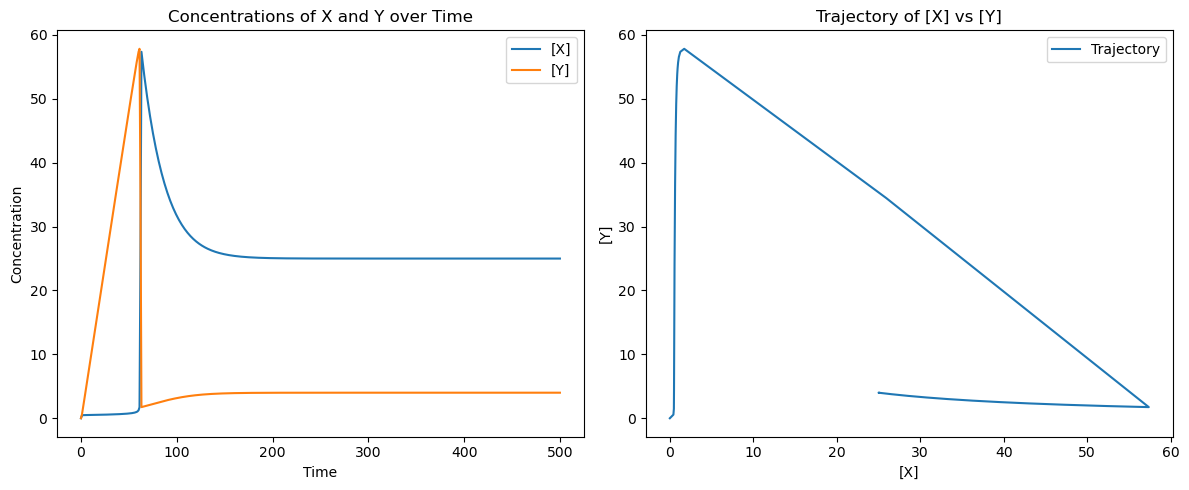

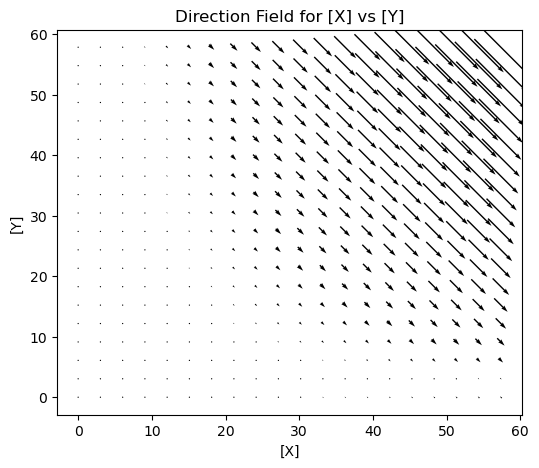

In [2]:
from scipy.integrate import odeint 
import numpy as np
import matplotlib.pyplot as plt

k1 = 1 
k2 = 2
k3 = 0.02
k4 = 0.04

def differential_equations(concentrations, t):
    X, Y = concentrations
    dxdt = k1 - k2*X + k3*(X**2)*Y - k4*X
    dydt = k2*X - k3*(X**2)*Y
    return dxdt, dydt

initial_values = [0,0]

time_points = np.linspace(0,500,500)

solve = odeint(differential_equations, initial_values, time_points)

X, Y = solve.T

plt.figure(figsize=(12, 5))

# Y and Y against time
plt.subplot(1, 2, 1)
plt.plot(time_points, X, label='[X]')
plt.plot(time_points, Y, label='[Y]')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Concentrations of X and Y over Time')
plt.legend()

# X and Y trajectory
plt.subplot(1, 2, 2)
plt.plot(X, Y, label='Trajectory')
plt.xlabel('[X]')
plt.ylabel('[Y]')
plt.title('Trajectory of [X] vs [Y]')
plt.legend()

plt.tight_layout()
plt.show()

# Define a grid for direction field
X_grid, Y_grid = np.meshgrid(np.linspace(0, max(X), 20), np.linspace(0, max(Y), 20))
dXdt_grid, dYdt_grid = differential_equations([X_grid, Y_grid], time_points[0])


# Plot the direction field
plt.figure(figsize=(6,5))
plt.quiver(X_grid, Y_grid, dXdt_grid, dYdt_grid, pivot='mid')
plt.xlabel('[X]')
plt.ylabel('[Y]')
plt.title('Direction Field for [X] vs [Y]')
plt.show()


The system intitially experiences a rapid increase in the concentration of both or one chemical to about 60 units of concentration. 

## Part 3


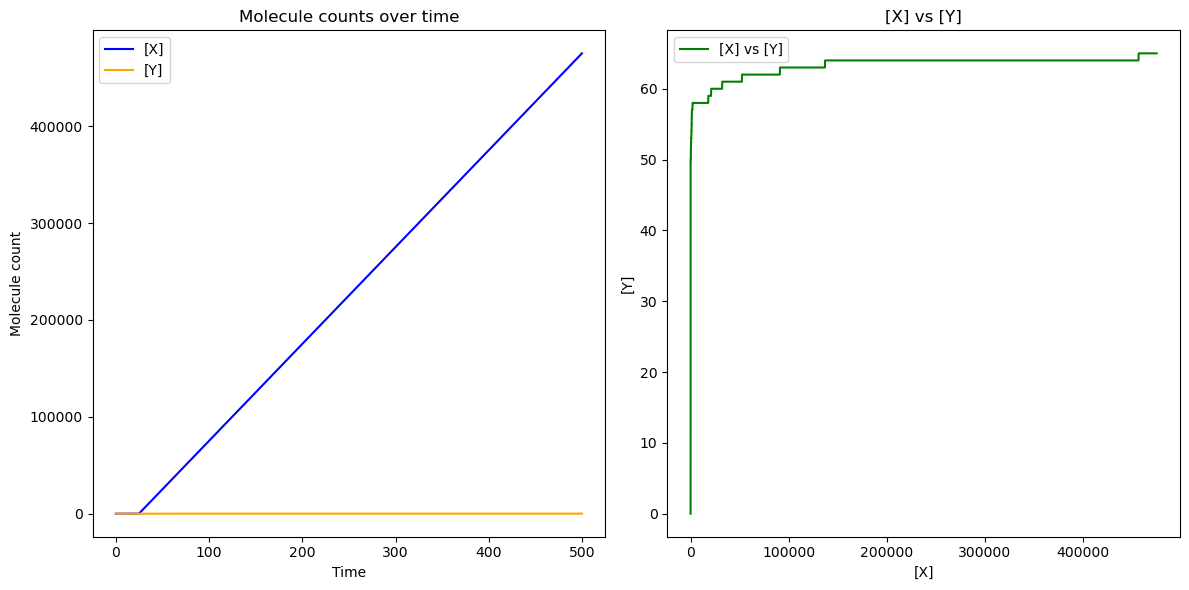

In [3]:


import numpy as np
import matplotlib.pyplot as plt

# Define the rate constants
k1 = 1.0
k2 = 2.0
k3 = 0.02
k4 = 0.04

# Initialize molecule counts
X = 0
Y = 0

# Record initial conditions
t = 0.0
t_max = 500
times = [t]
X_counts = [X]
Y_counts = [Y]
last_significant_time = t
last_significant_X = X
last_significant_Y = Y

# Set the threshold for a significant change to 10 molecules to reduce the number of iterations
significant_change_threshold = 10

# Gillespie algorithm
while t < t_max:
    # Calculate propensities
    a1 = k1
    a2 = k2 * X
    a3 = k3 * X**2 * Y if X > 1 else 0  # Ensure there are at least two X molecules
    a4 = k4 * X
    a0 = a1 + a2 + a3 + a4
    
    # If no more reactions can occur, break the loop
    if a0 == 0:
        break

    # Generate two random numbers
    r1 = np.random.rand()
    r2 = np.random.rand()

    # Calculate time until next reaction
    tau = (1.0 / a0) * np.log(1.0 / r1)
    
    # Ensure tau is not too small to prevent excessively long simulation times
    if tau < 1e-3:
        tau = 1e-3
    
    # Update time
    t += tau

    # Determine which reaction will occur
    if r2 < a1 / a0:
        # Reaction 1 occurs: 0 -> X
        X += 1
    elif r2 < (a1 + a2) / a0:
        # Reaction 2 occurs: X -> Y
        X -= 1
        Y += 1
    elif r2 < (a1 + a2 + a3) / a0:
        # Reaction 3 occurs: 2X + Y -> 3X
        X += 1  # Net gain of one X molecule
    else:
        # Reaction 4 occurs: X -> 0
        X -= 1

    # Record data if change in molecule count is at least the threshold
    if abs(X - last_significant_X) >= significant_change_threshold or abs(Y - last_significant_Y) >= significant_change_threshold:
        times.append(t)
        X_counts.append(X)
        Y_counts.append(Y)
        last_significant_X = X
        last_significant_Y = Y

# Plot results
plt.figure(figsize=(12, 6))

# Plot X and Y molecule counts over time
plt.subplot(1, 2, 1)
plt.plot(times, X_counts, label='[X]', color='blue')
plt.plot(times, Y_counts, label='[Y]', color='orange')
plt.xlabel('Time')
plt.ylabel('Molecule count')
plt.title('Molecule counts over time')
plt.legend()

# Plot X vs Y
plt.subplot(1, 2, 2)
plt.plot(X_counts, Y_counts, label='[X] vs [Y]', color='green')
plt.xlabel('[X]')
plt.ylabel('[Y]')
plt.title('[X] vs [Y]')
plt.legend()

plt.tight_layout()
plt.show()

# Note: Code is commented out to prevent execution. Uncomment for actual use.


